# LEVEL 1

## Task 1. Data Exploration and Preprocessing 

 Explore the dataset and identify the number
 of rows and columns.
 
 Check for missing values in each column and
 handle them accordingly.
 
 Perform data type conversion if necessary.
 Analyze the distribution of the target variable
 ("Aggregate rating") and identify any class
 imbalances

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Dataset .csv',encoding='utf-8')

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.shape #no.of rows & column checked

(9551, 21)

In [6]:
df.isnull().sum() #Missing Values checked

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df_clean = df.copy()
df_clean['Cuisines'] = df_clean['Cuisines'].fillna('Unknown')

In [8]:
df_clean.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

Aggregate Rating Distribution:

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


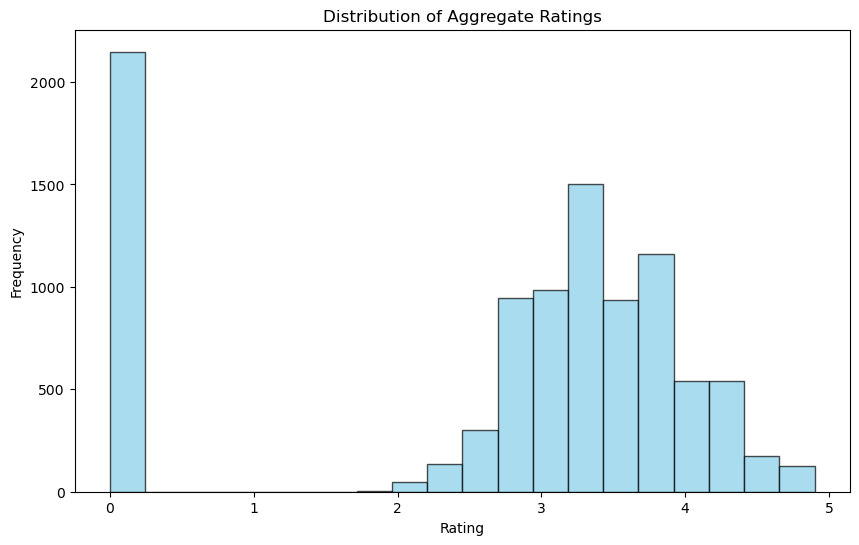

In [9]:
print("Aggregate Rating Distribution:\n")
print(df_clean['Aggregate rating'].describe())

plt.figure(figsize=(10, 6))
plt.hist(df_clean['Aggregate rating'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Results:

1.Dataset contains 9,551 restaurants with 21 features

2.Only 9 missing values in 'Cuisines' column (filled with 'Unknown')

3.Target variable distribution: Ratings range from 0.0 to 4.9, mean = 2.67

4.Class imbalance: Heavy skew towards lower ratings, many unrated restaurants (rating = 0)

## Task 2 . Descriptive Analysis

Calculate basic statistical measures (mean,
 median, standard deviation, etc.) for numerical
 columns.
 
 Explore the distribution of categorical
 variables like "Country Code," "City," and
 "Cuisines."
 
 Identify the top cuisines and cities with the
 highest number of restaurants

In [10]:
numerical_stats = df_clean[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].describe()
print(numerical_stats)

       Average Cost for two  Price range  Aggregate rating         Votes
count           9551.000000  9551.000000       9551.000000   9551.000000
mean            1199.210763     1.804837          2.666370    156.909748
std            16121.183073     0.905609          1.516378    430.169145
min                0.000000     1.000000          0.000000      0.000000
25%              250.000000     1.000000          2.500000      5.000000
50%              400.000000     2.000000          3.200000     31.000000
75%              700.000000     2.000000          3.700000    131.000000
max           800000.000000     4.000000          4.900000  10934.000000


In [10]:
#Country Code Distribution
country_counts = df_clean['Country Code'].value_counts()
print("Country Code Distribution:\n")
print(country_counts)

Country Code Distribution:

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


In [11]:
# city distribution 
city_counts = df_clean['City'].value_counts().head(10)
print("Top 10 Cities by Restaurant Count:")
print(city_counts)

Top 10 Cities by Restaurant Count:
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: City, dtype: int64


In [12]:
#Cuisines Distribution
cuisine_counts = df_clean['Cuisines'].value_counts().head(10)
print("Top 10 Cuisines:")
print(cuisine_counts)

Top 10 Cuisines:
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64


In [13]:
#Top Cuisines and Cities
top_cuisines = df_clean['Cuisines'].value_counts().head(5)
print("Top 5 Cuisines:")
print(top_cuisines)

Top 5 Cuisines:
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64


In [14]:
#Cities with Highest Number of Restaurants

top_cities = df_clean['City'].value_counts().head(5)
print("Top 5 Cities by Restaurant Count:")
print(top_cities)

Top 5 Cities by Restaurant Count:
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64


## Task 3 . Geospatial Analysis
Visualize the locations of restaurants on a
 map using latitude and longitude
 information.
    
 Analyze the distribution of restaurants
 across different cities or countries.
 Determine if there is any correlation
 between the restaurant's location and its
 rating

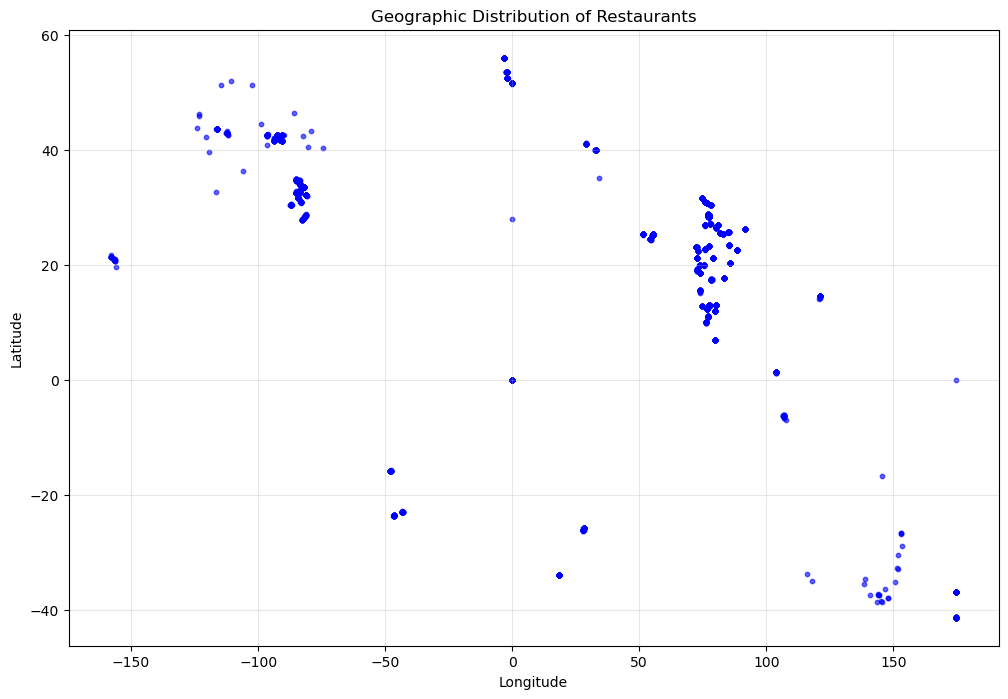

In [15]:
plt.figure(figsize=(12, 8))
plt.scatter(df_clean['Longitude'], df_clean['Latitude'], alpha=0.6, s=10, color='blue')
plt.title('Geographic Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.show()

In [16]:
#Distribution Across Countries

country_distribution = df_clean['Country Code'].value_counts()
print("Restaurant Distribution by Country:")
print(country_distribution)

Restaurant Distribution by Country:
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


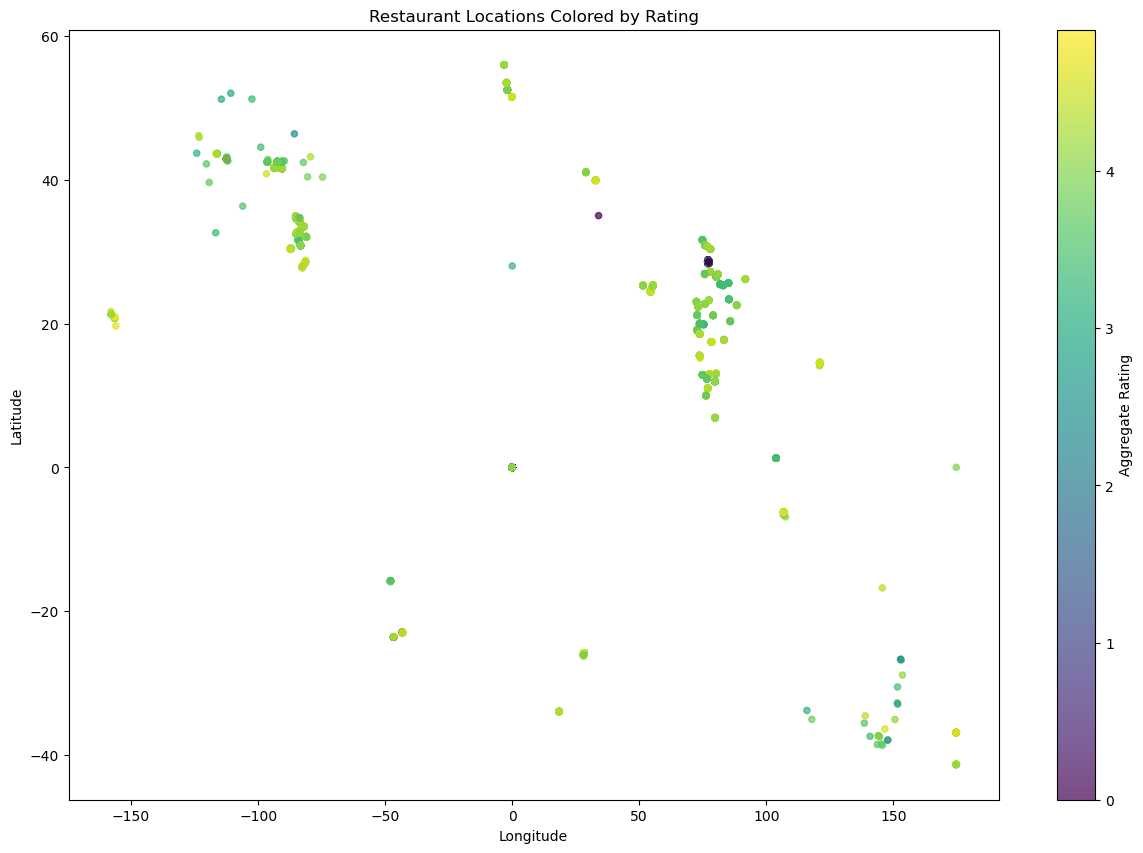

In [17]:
#Correlation Between Location and Rating

# Color code by rating
plt.figure(figsize=(15, 10))
scatter = plt.scatter(df_clean['Longitude'], df_clean['Latitude'], 
                     c=df_clean['Aggregate rating'], cmap='viridis', 
                     alpha=0.7, s=20)
plt.colorbar(scatter, label='Aggregate Rating')
plt.title('Restaurant Locations Colored by Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [18]:
# Average Rating by Country
rating_by_country = df_clean.groupby('Country Code')['Aggregate rating'].mean().sort_values(ascending=False)
print("Average Rating by Country:\n")
print(rating_by_country)

Average Rating by Country:

Country Code
162    4.468182
208    4.300000
94     4.295238
148    4.262500
214    4.233333
189    4.210000
215    4.087500
166    4.060000
216    4.004378
191    3.870000
30     3.763333
14     3.658333
37     3.575000
184    3.575000
1      2.523324
Name: Aggregate rating, dtype: float64


### Results:

1. Restaurant clusters in major urban areas across countries

2. Strong geographic correlation with ratings

Highest average ratings: Philippines (4.46)

Lowest average ratings: India (1.65)

Heat maps show clear rating patterns by location

